<a href="https://colab.research.google.com/github/ShubhFuladi06/ML-Careercraft/blob/main/missing_value_treatment_and_data_interploation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')

In [5]:
df.shape

(891, 15)

In [6]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


In [8]:
(df.isnull().sum() / len(df)*100).sort_values(ascending=False)

,0
deck,77.216611
age,19.865320
embarked,0.224467
embark_town,0.224467
sex,0.000000
pclass,0.000000
survived,0.000000
fare,0.000000
parch,0.000000
sibsp,0.000000


In [9]:
## method1. drop all the rows with na
df_dropna = df.dropna()
df_dropna.shape

(182, 15)

In [10]:
## method2.drop colomn with more than 40 percent of null values
threshold = 0.4
df_dropcols = df.loc[:, df.isnull().mean() < threshold]
df_dropcols.shape

(891, 14)

In [11]:
df_dropcols.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [12]:
## method3 imputation

df.isna().sum()


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [13]:
df.age.mean()

np.float64(29.69911764705882)

In [14]:
#mean
df.age.fillna(df.age.mean())

,age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [15]:
#median
df.age.fillna(df.age.median())

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [16]:
#constant
df.age.fillna(0)

,age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,0.0
889,26.0


In [17]:
#mode for categorical data
df.embarked.fillna(df.embarked.mode())


,embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [18]:
#mean, median, mode, constant using simple imputer

In [19]:
df_simple = df.copy()

In [20]:
df_simple.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [21]:
from sklearn.impute import SimpleImputer

# The imputation strategy.

# If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.

# If “median”, then replace missing values using the median along each column. Can only be used with numeric data.

# If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

# If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

In [22]:
median_imputer = SimpleImputer(strategy = 'median')
median_imputer
## median_imputer is an object of simpleImputer
##it needs to calculate the median value of the data  >> fit
#replace the null value with this median value   >> transform

SimpleImputer(strategy='median')

In [23]:
median_imputer.fit(df_simple[['age']])   ## learns the median

SimpleImputer(strategy='median')

In [24]:
df_simple['age'] = median_imputer.transform(df_simple[['age']])  #transform applies the learned median to the data

In [25]:
df_simple['age'].isna().sum()

np.int64(0)

In [26]:
df_simple['age'] = median_imputer.fit_transform(df_simple[['age']])

In [27]:
#embarked column

mode_imputer = SimpleImputer(strategy='most_frequent')
df_simple['embarked'] = mode_imputer.fit_transform(df_simple[['embarked']]).ravel() #it returns 2d array and .ravel will flatten

In [28]:
df_simple['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:

df_simple[['embarked']].value_counts()


,count
embarked,
S,646
C,168
Q,77


In [30]:
###can fit and transform be used for both train and test data?
#fit_transform >> train data
#transform >> can be used for test data. why? because test data is representative of unseen data,
#you can not learn anything from test data


#fit_transform>> in data pre processing
#fit_predict >> machine learning models >> fit and predict can be used on train data but on test data only predict


In [31]:
const_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df_simple['embark_town'] = const_imputer.fit_transform(df[['embark_town']]).ravel()

In [32]:
df_simple['embark_town'].isna().sum()

np.int64(0)

In [33]:
# There is no diffrent in using sim-ple imputer class and directkly replacing mean median mode
#then why simple imputer?
# because other pre-processing steps (scaling) have modular structure(class-object)
#so for uniformlity all preprocessing steps imputation has also its own class
# very helpfull in pipeline

In [34]:
# making a separate colomn for missing value flag

df_indicator = df.copy()

#create a binary colomn> 1 if missing else 0
df_indicator.age.isna().sum()

np.int64(177)

In [35]:
df_indicator['age_missing'] = df_indicator['age'].isnull().astype(int)

In [36]:
#for rest of the misisng value do eith mean or median imputation
df_indicator['age'] = median_imputer.fit_transform(df[['age']]).ravel()

In [37]:
df_indicator.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [38]:
df_indicator.age_missing

,age_missing
0,0
1,0
2,0
3,0
4,0
...,...
886,0
887,0
888,1
889,0


In [39]:
### KNN Imputer

In [40]:
from sklearn.impute import KNNImputer ## Using knn algorithm model
from sklearn.preprocessing import LabelEncoder  # to convert string value to number

In [41]:
df_knn = df[['age', 'fare', 'embarked', 'pclass']].copy()
df_knn

,age,fare,embarked,pclass
0,22.0,7.2500,S,3
1,38.0,71.2833,C,1
2,26.0,7.9250,S,3
3,35.0,53.1000,S,1
4,35.0,8.0500,S,3
...,...,...,...,...
886,27.0,13.0000,S,2
887,19.0,30.0000,S,1
888,NaN,23.4500,S,3
889,26.0,30.0000,C,1


In [42]:
df_knn.isna().sum()

,0
age,177
fare,0
embarked,2
pclass,0


In [43]:
## label encoding

df_knn['embarked'] = df_knn['embarked'].astype(str)
le = LabelEncoder()
df_knn['embarked'] = le.fit_transform(df_knn['embarked'])

In [44]:
df_knn

,age,fare,embarked,pclass
0,22.0,7.2500,2,3
1,38.0,71.2833,0,1
2,26.0,7.9250,2,3
3,35.0,53.1000,2,1
4,35.0,8.0500,2,3
...,...,...,...,...
886,27.0,13.0000,2,2
887,19.0,30.0000,2,1
888,NaN,23.4500,2,3
889,26.0,30.0000,0,1


In [45]:
# Apply knn imputer

knn_imputer = KNNImputer(n_neighbors=5)   #take the average of 5 nearest value for imputation
knn_imputer.fit_transform(df_knn)

array([[22.    ,  7.25  ,  2.    ,  3.    ],
       [38.    , 71.2833,  0.    ,  1.    ],
       [26.    ,  7.925 ,  2.    ,  3.    ],
       ...,
       [27.8   , 23.45  ,  2.    ,  3.    ],
       [26.    , 30.    ,  0.    ,  1.    ],
       [32.    ,  7.75  ,  1.    ,  3.    ]])

In [46]:
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns = df_knn.columns)

In [47]:
df_knn_imputed

,age,fare,embarked,pclass
0,22.0,7.2500,2.0,3.0
1,38.0,71.2833,0.0,1.0
2,26.0,7.9250,2.0,3.0
3,35.0,53.1000,2.0,1.0
4,35.0,8.0500,2.0,3.0
...,...,...,...,...
886,27.0,13.0000,2.0,2.0
887,19.0,30.0000,2.0,1.0
888,27.8,23.4500,2.0,3.0
889,26.0,30.0000,0.0,1.0


In [48]:
#mice>> multivariate imputation by chained equation
#Multivariate imputer that estimates each feature from all the others.
# A strategy for imputing missing values by modeling each feature
# with missing values as a function of other features in a round-robin fashion.
#by default BayesianRidge() is used


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_mice = df[['age', 'fare', 'pclass', 'sibsp']].copy()

mice_imputer = IterativeImputer(random_state=42)
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

print(df_mice_imputed.head())

    age     fare  pclass  sibsp
0  22.0   7.2500     3.0    1.0
1  38.0  71.2833     1.0    1.0
2  26.0   7.9250     3.0    0.0
3  35.0  53.1000     1.0    1.0
4  35.0   8.0500     3.0    0.0


In [49]:
#interpolation
df_interp = df[['age', 'fare']].copy()

df_interp = df_interp.sort_values(by='age')
df_interp['age'] = df_interp['age'].interpolate(method='linear')
df_interp['fare'] = df_interp['fare'].interpolate(method='linear')


df_interp.head()

,age,fare
803,0.42,8.5167
755,0.67,14.5000
644,0.75,19.2583
469,0.75,19.2583
78,0.83,29.0000


In [50]:
df_interp.isna().sum()

,0
age,0
fare,0


In [51]:
#for time series imputation

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a date range
date_range = pd.date_range(start='2024-01-01', periods=30, freq='D')
temps = np.random.normal(25, 3, size=30)
temps[[5, 8, 12, 20]] = np.nan  # introduce missing values

df = pd.DataFrame({'date': date_range, 'temp': temps}).set_index('date')

In [53]:
df

,temp
date,
2024-01-01,25.171721
2024-01-02,28.834150
2024-01-03,28.614434
2024-01-04,29.928555
2024-01-05,23.100876
2024-01-06,NaN
2024-01-07,24.588095
2024-01-08,23.133718
2024-01-09,NaN


In [54]:
df.isnull().sum()

,0
temp,4


In [55]:
#ffill >> filled by previous value

df_ffill = df.copy()
df_ffill['temp'] = df_ffill['temp'].fillna(method='ffill')

/tmp/ipython-input-1298251390.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill['temp'] = df_ffill['temp'].fillna(method='ffill')


In [56]:
df_ffill

,temp
date,
2024-01-01,25.171721
2024-01-02,28.834150
2024-01-03,28.614434
2024-01-04,29.928555
2024-01-05,23.100876
2024-01-06,23.100876
2024-01-07,24.588095
2024-01-08,23.133718
2024-01-09,23.133718


In [57]:
#bfill >> backward fill>> next value

df_bfill = df.copy()
df_bfill['temp'] = df_bfill['temp'].fillna(method='bfill')

/tmp/ipython-input-1766221173.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill['temp'] = df_bfill['temp'].fillna(method='bfill')


In [58]:
#rolling mean

df_roll = df.copy()
df_roll['temp'] = df_roll['temp'].fillna(df_roll['temp'].rolling(window=2, min_periods=1).mean())

In [59]:
df_roll

,temp
date,
2024-01-01,25.171721
2024-01-02,28.834150
2024-01-03,28.614434
2024-01-04,29.928555
2024-01-05,23.100876
2024-01-06,23.100876
2024-01-07,24.588095
2024-01-08,23.133718
2024-01-09,23.133718


In [60]:
#linear interpolation >> Straight line between known points.
df_interp = df.copy()
df_interp['temp'] = df_interp['temp'].interpolate(method='linear')

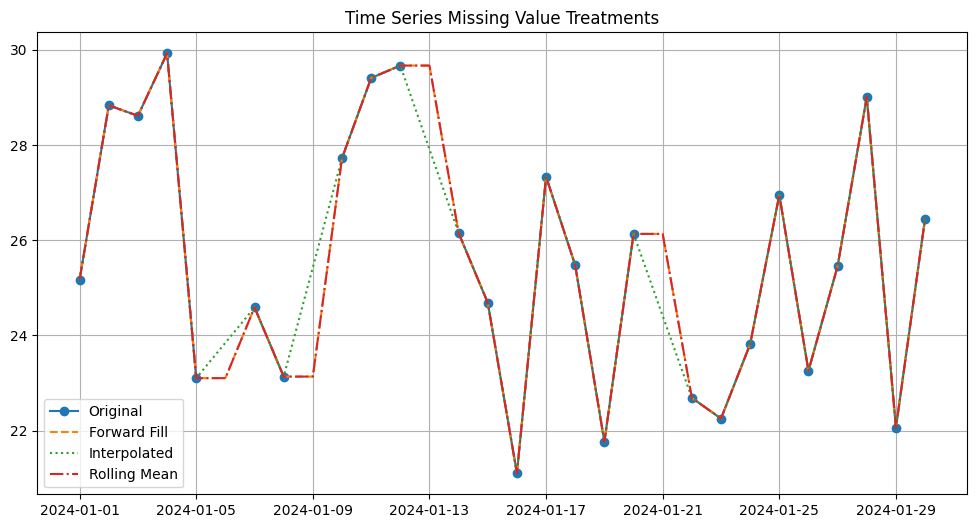

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original', marker='o')
plt.plot(df_ffill, label='Forward Fill', linestyle='--')
plt.plot(df_interp, label='Interpolated', linestyle=':')
plt.plot(df_roll, label='Rolling Mean', linestyle='-.')
plt.legend()
plt.title("Time Series Missing Value Treatments")
plt.grid(True)
plt.show()

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create time series with missing values
dates = pd.date_range('2023-01-01', periods=10)
values = [10, np.nan, np.nan, 16, 18, np.nan, 22, 24, np.nan, 28]

df = pd.DataFrame({'date': dates, 'value': values}).set_index('date')


In [63]:
#time based interpolation
df_time = df.copy()
df_time['value'] = df_time['value'].interpolate(method='time')

# Like linear, but adjusts for actual time difference between dates., Best for: Irregular time intervals

In [64]:
#index interploation>> Interpolates along the index (useful if index is numeric or time)
df_index = df.copy()
df_index['value'] = df_index['value'].interpolate(method='index')


In [65]:
#polynomial interpolation>> Best for: Curved trends (e.g., parabolic),Risky with outliers or short data
df_poly = df.copy()
df_poly['value'] = df_poly['value'].interpolate(method='polynomial', order=2)

In [66]:
#Spline Interpolation>> Fits a smooth spline curve through points., smooth transitions, needs enough data points

In [67]:
df_spline = df.copy()
df_spline['value'] = df_spline['value'].interpolate(method='spline', order=2)

Method: linear
Description: Straight line between points
Good For: Smooth data
Code: .interpolate('linear')

Method: time
Description: Adjusts for time intervals
Good For: Time series with gaps
Code: .interpolate('time')

Method: index
Description: Uses index values
Good For: Numeric or datetime index
Code: .interpolate('index')

Method: polynomial
Description: Fits polynomial curve
Good For: Curved trends
Code: .interpolate('polynomial', order=2)

Method: spline
Description: Smooth spline curve
Good For: Smooth data
Code: .interpolate('spline', order=2)

Method: pad (forward fill)
Description: Copies previous value
Good For: Inventory data, counters
Code: .fillna(method='ffill')

Method: bfill (backward fill)
Description: Copies next value
Good For: Rare use, potentially risky
Code: .fillna(method='bfill')

#data interpolation

Interpolation is the process of estimating unknown data points within the range of a known set of data points.

Unlike imputation using mean/median, interpolation uses neighboring values and their order — very useful for time series or continuous numerical data.

In [68]:
#why interpolate
#preserve trends, User temporal structure, works on continuous data


#major type of interpolation

#linear interpolation
#cubic interpolation
#polynomial interpolation

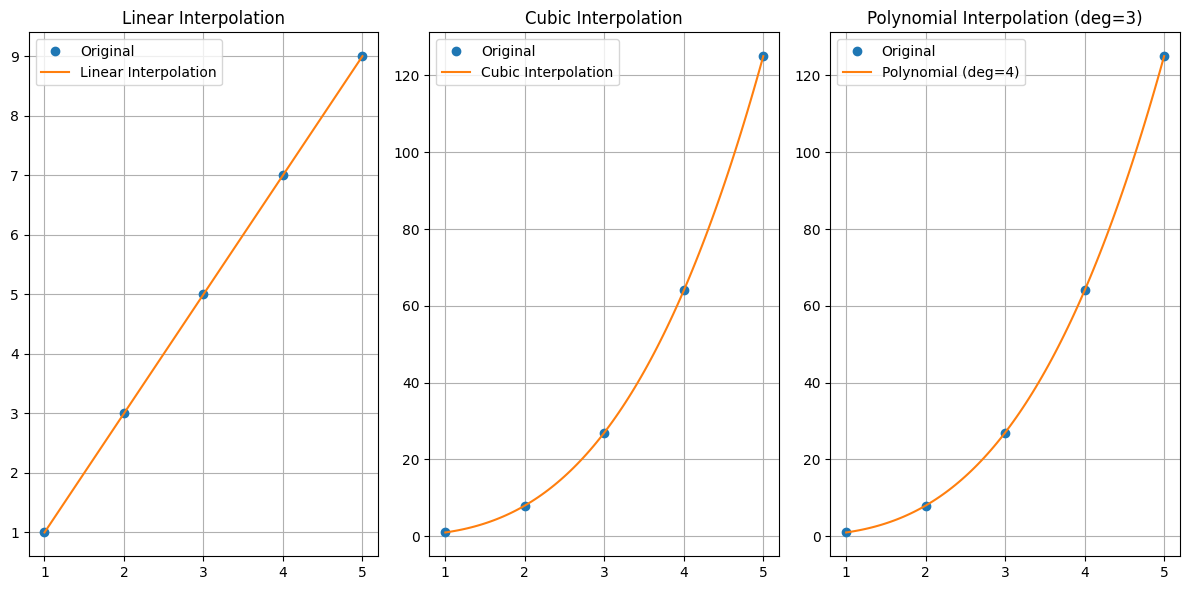

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Original data
x = np.array([1, 2, 3, 4, 5])
y_linear = np.array([1, 3, 5, 7, 9])       # Linear
y_cubic = np.array([1, 8, 27, 64, 125])    # y = x^3 (Cubic)

# New x values (interpolated points)
x_new = np.linspace(1, 5, 100)

#Linear Interpolation
f_linear = interp1d(x, y_linear, kind='linear')
y_linear_interp = f_linear(x_new)

#Cubic Interpolation
f_cubic = interp1d(x, y_cubic, kind='cubic')
y_cubic_interp = f_cubic(x_new)

#Polynomial Interpolation (e.g., degree 3 fit)
# We'll use numpy's polyfit + polyval for general polynomial
coeffs = np.polyfit(x, y_cubic, deg=4)   # Fit a 4th-degree polynomial
y_poly_interp = np.polyval(coeffs, x_new)

# Plotting
plt.figure(figsize=(12, 6))

# Linear
plt.subplot(1, 3, 1)
plt.plot(x, y_linear, 'o', label='Original')
plt.plot(x_new, y_linear_interp, '-', label='Linear Interpolation')
plt.title("Linear Interpolation")
plt.legend()
plt.grid()

# Cubic
plt.subplot(1, 3, 2)
plt.plot(x, y_cubic, 'o', label='Original')
plt.plot(x_new, y_cubic_interp, '-', label='Cubic Interpolation')
plt.title("Cubic Interpolation")
plt.legend()
plt.grid()

# Polynomial Fit (degree 3)
plt.subplot(1, 3, 3)
plt.plot(x, y_cubic, 'o', label='Original')
plt.plot(x_new, y_poly_interp, '-', label='Polynomial (deg=4)')
plt.title("Polynomial Interpolation (deg=3)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [70]:
!git clone https://github.com/ShubhFuladi06/ML-Careercraft.git

fatal: destination path 'ML-Careercraft' already exists and is not an empty directory.
